## matplotlib

Matplotlib is the core plotting package in scientific python.  There are others to explore as well (which we'll chat about on slack).

Note: the latest version of matplotlib (2.0) introduced a number of style changes.  This is the version we use here.

Also, there are different interfaces for interacting with matplotlib, an interactive, function-drive commandset and an object-oriented version.

We want matplotlib to work inline in the notebook.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Matplotlib concepts

Matplotlib was designed with the following goals (from mpl docs):

* Plots should look great -- publication quality (e.g. antialiased)
* Postscript output for inclusion with TeX documents
* Embeddable in a graphical user interface for application development
* Code should be easy to understand it and extend
* Making plots should be easy

Matplotlib is mostly for 2-d data, but there are some basic 3-d (surface) interfaces.

Volumetric data requires a different approach

### Gallery

Matplotlib has a great gallery on their webpage -- find something there close to what you are trying to do and use it as a starting point:

http://matplotlib.org/gallery.html

### Importing

There are several different interfaces for matplotlib (see http://matplotlib.org/faq/usage_faq.html)

Basic ideas:

* `matplotlib` is the entire package
* `matplotlib.pyplot` is a module within matplotlib that provides easy access to the core plotting routines
* `pylab` combines pyplot and numpy into a single namespace to give a MatLab like interface

There are a number of modules that extend its behavior, e.g. `basemap` for plotting on a sphere, `mplot3d` for 3-d surfaces


### Anatomy of a figure

Figures are the highest level obect and can inlcude multiple axes
![](anatomy1.png)

(figure from: http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure )


### Backends

Interactive backends: pygtk, wxpython, tkinter, ...

Hardcopy backends: PNG, PDF, PS, SVG, ...



# Basic plotting

plot() is the most basic command.  Here we also see that we can use LaTeX notation for the axes

(0, 6.283185307179586)

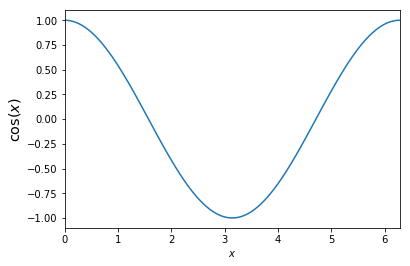

In [3]:
x = np.linspace(0,2.0*np.pi, num=100)
y = np.cos(x)

plt.plot(x,y)
plt.xlabel(r"$x$")
plt.ylabel(r"$\cos(x)$", fontsize="x-large")
plt.xlim(0, 2.0*np.pi)

we can plot multiple lines on a plot and set their colors or linestyle -- the latter come through the third argument.  Here we also tighten up the x range of the plot

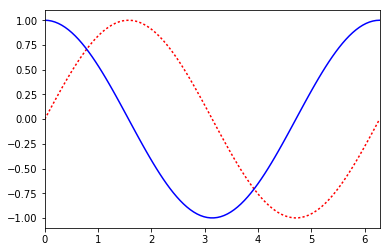

In [4]:
plt.clf()
plt.plot(x, np.sin(x), color="r", linestyle=":")
plt.plot(x, np.cos(x), "b-")
plt.xlim(0.0, 2.0*np.pi)
plt.show()

we can use symbols instead of lines pretty easily too -- and label them

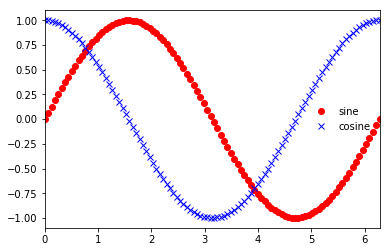

In [5]:
plt.plot(x, np.sin(x), "ro", label="sine")
plt.plot(x, np.cos(x), "bx", label="cosine")
plt.xlim(0.0, 2.0*np.pi)
plt.legend(frameon=False, loc=5)

most functions take a number of optional named argumets too

(0.0, 6.283185307179586)

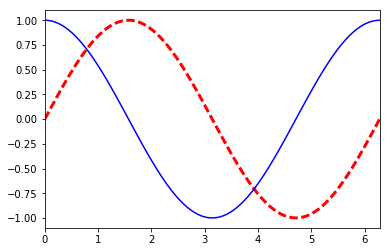

In [6]:
plt.plot(x, np.sin(x), "r--", linewidth=3.0)
plt.plot(x, np.cos(x), "b-")
plt.xlim(0.0, 2.0*np.pi)

there is a command setp() that can also set the properties.  We can get the list of settable properties as

  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  antialiased or aa: [True | False] 
  axes: an :class:`~matplotlib.axes.Axes` instance 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  color or c: any matplotlib color 
  contains: a callable function 
  dash_capstyle: ['butt' | 'round' | 'projecting'] 
  dash_joinstyle: ['miter' | 'round' | 'bevel'] 
  dashes: sequence of on/off ink in points 
  drawstyle: ['default' | 'steps' | 'steps-pre' | 'steps-mid' | 'steps-post'] 
  figure: a :class:`matplotlib.figure.Figure` instance 
  fillstyle: ['full' | 'left' | 'right' | 'bottom' | 'top' | 'none'] 
  gid: an id string 
  label: string or anything printable with '%s' conversion. 
  linestyle or ls: ['solid' | 'dashed', 'dashdot', 'dotted' | (offset, on-off-dash

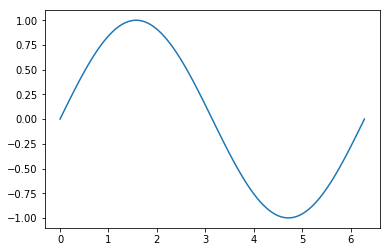

In [7]:
line = plt.plot(x, np.sin(x))
plt.setp(line)

# Multiple axes

there are a wide range of methods for putting multiple axes on a grid.  We'll look at the simplest method.  All plotting commands apply to the current set of axes

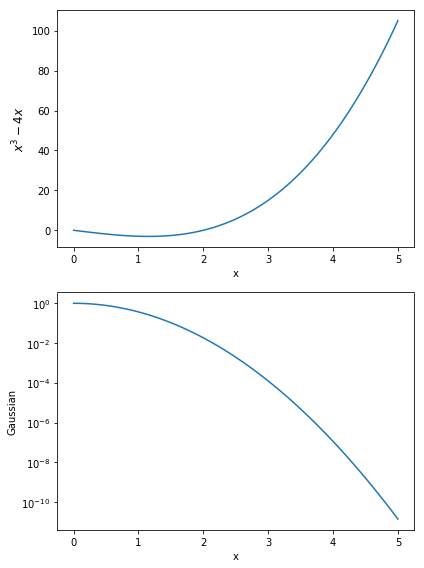

In [8]:
plt.subplot(211)

x = np.linspace(0,5,100)
plt.plot(x, x**3 - 4*x)
plt.xlabel("x")
plt.ylabel(r"$x^3 - 4x$", fontsize="large")

plt.subplot(212)

plt.plot(x, np.exp(-x**2))
plt.xlabel("x")
plt.ylabel("Gaussian")

# log scale
ax = plt.gca()
ax.set_yscale("log")

# get the figure and set its size
f = plt.gcf()
f.set_size_inches(6,8)

# tight_layout() makes sure things don't overlap
plt.tight_layout()
plt.savefig("test.png")

# Visualizing 2-d array data

(100, 100)


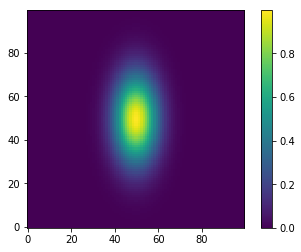

In [9]:
def g(x, y):
    return np.exp(-((x-0.5)**2)/0.1**2 - ((y-0.5)**2)/0.2**2)

N = 100

x = np.linspace(0.0,1.0,N)
y = x.copy()

xv, yv = np.meshgrid(x, y)
print(xv.shape)
plt.imshow(g(xv,yv), origin="lower")
plt.colorbar()


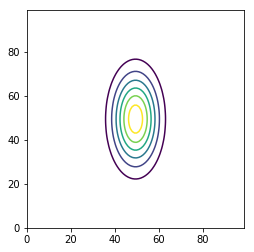

In [10]:
plt.contour(g(xv,yv))
ax = plt.axis("scaled")   # this adjusts the size of image to make x and y lengths equal


# Error bars

<Container object of 3 artists>

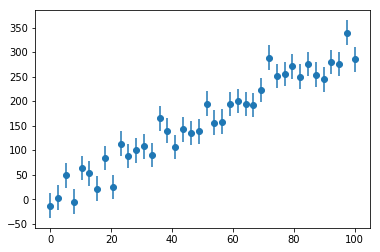

In [11]:
def y_experiment(a1, a2, sigma, x):
    """ return the experimental data in a linear + random fashion a1
        is the intercept, a2 is the slope, and sigma is the error """

    N = len(x)

    # randn gives samples from the "standard normal" distribution
    r = np.random.randn(N)
    y = a1 + a2*x + sigma*r
    return y

N = 40
x = np.linspace(0.0, 100.0, N)
sigma = 25.0*np.ones(N)
y = y_experiment(10.0, 3.0, sigma, x)

plt.errorbar(x, y, yerr=sigma, fmt="o")

# Annotations

adding text and annotations is easy

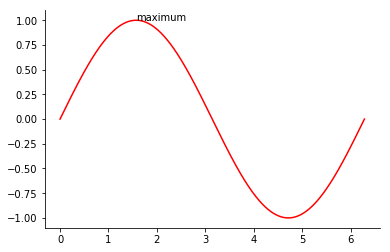

In [12]:
xx = np.linspace(0, 2.0*np.pi, 1000)
plt.plot(xx, np.sin(xx), color="r")
plt.text(np.pi/2, np.sin(np.pi/2), r"maximum")
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')                                           
ax.yaxis.set_ticks_position('left') 

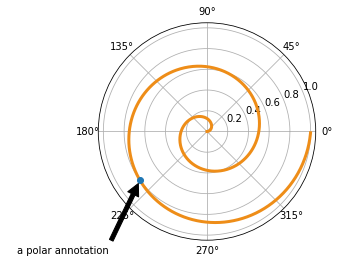

In [13]:
#example from http://matplotlib.org/examples/pylab_examples/annotation_demo.html
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
r = np.arange(0, 1, 0.001)
theta = 2*2*np.pi*r
line, = ax.plot(theta, r, color='#ee8d18', lw=3)

ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom',
            )


The background image for the class advertisement was made using python + matplotlib

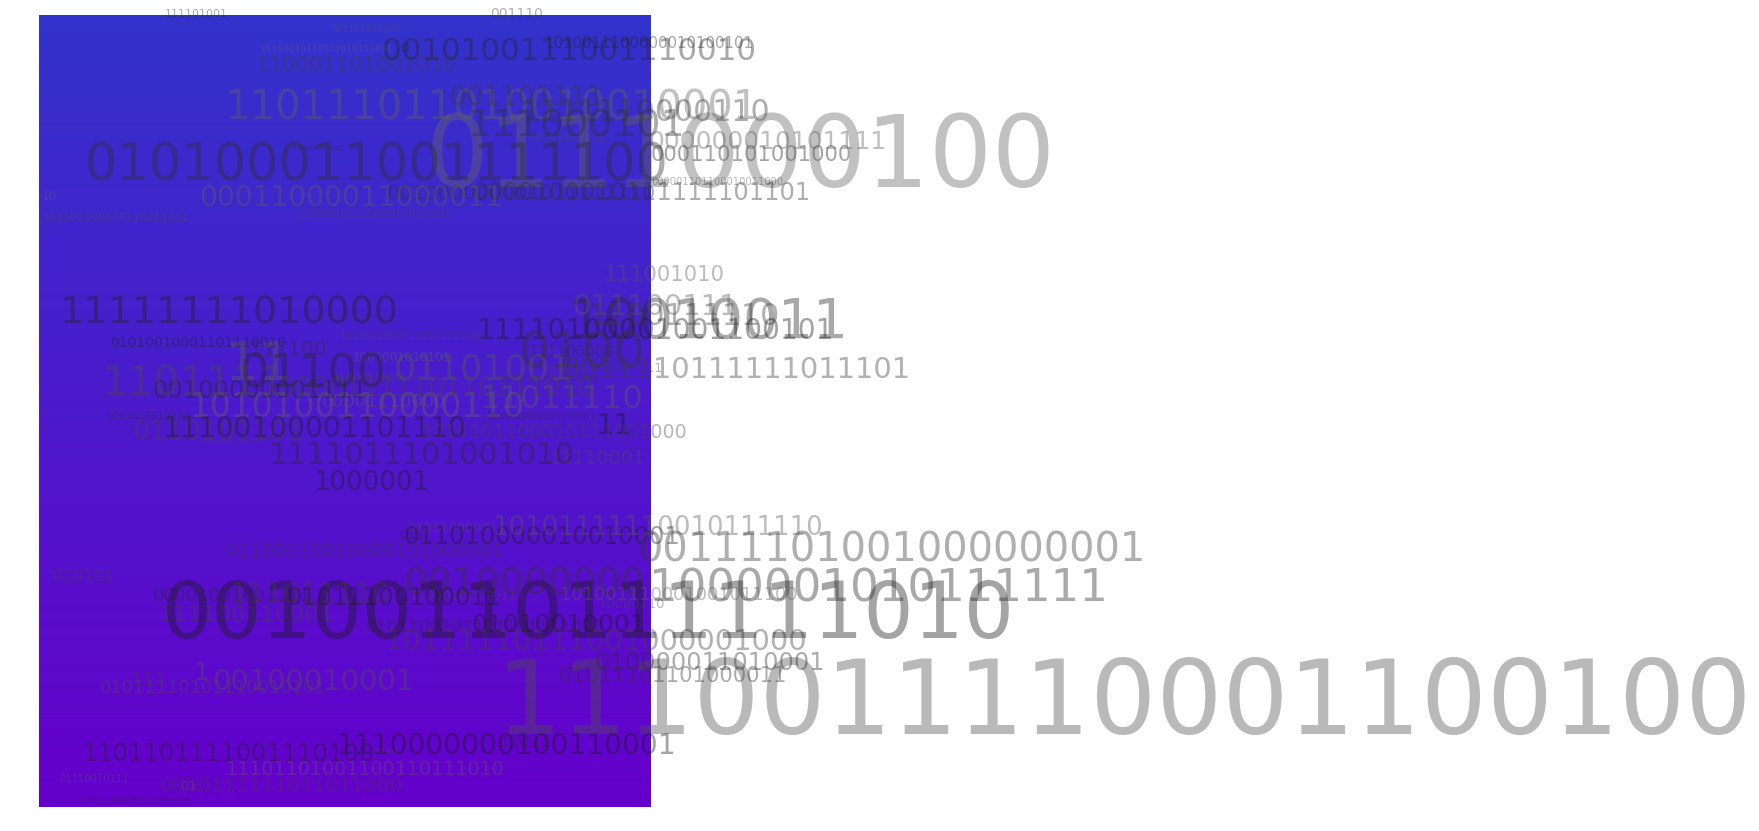

In [14]:
import random

class Gradient(object):
    def __init__(self, start_color, end_color, orientation="h"):
        self.start_color = start_color
        self.end_color = end_color
        self.orientation = orientation

    def get_img_array(self, W, H):
        a = np.zeros((H, W, 3), dtype=np.float64)
        r0, g0, b0 = self.start_color
        r1, g1, b1 = self.end_color

        if self.orientation == "h":
            for n, r in enumerate([(r0, r1), (g0, g1), (b0, b1)]):
                col = np.linspace(r[0], r[1], num=W, endpoint=True)
                a[:,:,n] = col[np.newaxis,:]
        elif self.orientation == "v":
            for n, r in enumerate([(r0, r1), (g0, g1), (b0, b1)]):
                row = np.linspace(r[0], r[1], num=H, endpoint=True)
                a[:,:,n] = row[:,np.newaxis]
            
        return a/256.0

class RandomBinary(object):
    def __init__(self):
        ONE = "1"
        ZERO = "0"
        self.len = random.randrange(0,24)

        self.str = ""
        for n in range(self.len):
            self.str += random.choice([ONE, ZERO])

        self.size = int(random.lognormvariate(3, 0.6))  # 3 here makes the average e**3 ~ 20

        self.color = str(random.uniform(0.1, 0.4))

        self.x = random.uniform(0.0, 1.0)
        self.y = random.uniform(0.0, 1.0)


g = Gradient((51,51,204), (102,0,204), orientation="v")

W = 850
H = 1100
i = g.get_img_array(W, H)

f = plt.gcf()

plt.imshow(i)

# random drawing of binary text
N = 100
for n in range(N):
    b = RandomBinary()
    plt.text(b.x, b.y, b.str, transform=f.transFigure, fontsize=b.size, color=b.
color, alpha=0.4)


plt.axis("off")
plt.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)


f.set_size_inches(W/100., H/100.)

plt.show()

# Surface plots

matplotlib can't deal with true 3-d data (i.e., x,y,z + a value), but it can plot 2-d surfaces and lines in 3-d.

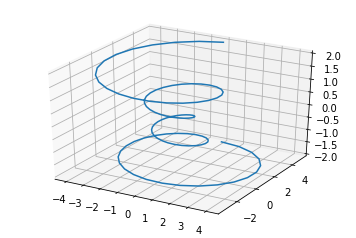

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection="3d")

# parametric curves
N = 100
theta = np.linspace(-4*np.pi, 4*np.pi, N)
z = np.linspace(-2, 2, N)
r = z**2 + 1

x = r*np.sin(theta)
y = r*np.cos(theta)

ax.plot(x,y,z)

  agg_filter: unknown
  alpha: float or None 
  animated: [True | False] 
  antialiased or antialiaseds: Boolean or sequence of booleans 
  array: unknown
  axes: an :class:`~matplotlib.axes.Axes` instance 
  clim: a length 2 sequence of floats 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  cmap: a colormap or registered colormap name 
  color: matplotlib color arg or sequence of rgba tuples
  contains: a callable function 
  edgecolor: unknown
  edgecolors: unknown
  facecolor: unknown
  facecolors: unknown
  figure: a :class:`matplotlib.figure.Figure` instance 
  gid: an id string 
  hatch: [ '/' | '\\' | '|' | '-' | '+' | 'x' | 'o' | 'O' | '.' | '*' ] 
  label: string or anything printable with '%s' conversion. 
  linestyle or dashes or linestyles: ['solid' | 'dashed', 'dashdot', 'dotted' | (offset, on-of

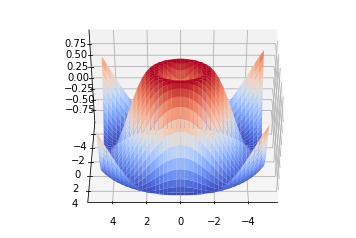

In [16]:
fig = plt.figure()
ax = fig.gca(projection="3d")
X = np.arange(-5,5, 0.25)
Y = np.arange(-5,5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="coolwarm")

# we can use setp to investigate and set options here too
plt.setp(surf)
plt.setp(surf,lw=0)
plt.setp(surf, facecolor="red")


# and the view (note: most interactive backends will allow you to rotate this freely)
ax = plt.gca()
ax.azim = 90
ax.elev = 40

# Plotting on a sphere

the map funcationality expects stuff in longitude and latitude, so if you want to plot x,y,z on the surface of a sphere using the idea of spherical coordinates, remember that the spherical angle from z (theta) is co-latitude

note: you need the python-basemap package installed for this to work

This also illustrates getting access to a matplotlib toolkit

/usr/lib64/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()


(1, 0, 0)
(0, 1, 0)
(0, 0, 1)


/usr/lib64/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib64/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


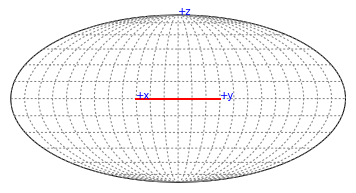

In [17]:
def to_lonlat(x,y,z):
    SMALL = 1.e-100
    rho = np.sqrt((x + SMALL)**2 + (y + SMALL)**2)
    R = np.sqrt(rho**2 + (z + SMALL)**2)
    
    theta = np.degrees(np.arctan2(rho, z + SMALL))
    phi = np.degrees(np.arctan2(y + SMALL, x + SMALL))
    
    # latitude is 90 - the spherical theta
    return (phi, 90-theta)


from mpl_toolkits.basemap import Basemap

# other projections are allowed, e.g. "ortho", moll"
map = Basemap(projection='moll', lat_0 = 45, lon_0 = 45,
              resolution = 'l', area_thresh = 1000.)

map.drawmapboundary()

map.drawmeridians(np.arange(0, 360, 15), color="0.5", latmax=90)
map.drawparallels(np.arange(-90, 90, 15), color="0.5", latmax=90) #, labels=[1,0,0,1])

# unit vectors (+x, +y, +z)
points = [(1,0,0), (0,1,0), (0,0,1)]
labels = ["+x", "+y", "+z"]

for i in range(len(points)):
    p = points[i]
    print(p)
    lon, lat = to_lonlat(p[0], p[1], p[2])
    xp, yp = map(lon, lat)
    s = plt.text(xp, yp, labels[i], color="b", zorder=10)

# draw a great circle arc between two points
lats = [0, 0]
lons = [0, 90]

map.drawgreatcircle(lons[0], lats[0], lons[1], lats[1], linewidth=2, color="r")



/usr/lib64/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()


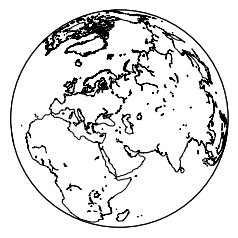

In [18]:
map = Basemap(projection='ortho', lat_0 = 45, lon_0 = 45,
              resolution = 'l', area_thresh = 1000.)

map.drawcoastlines()
map.drawmapboundary()

# Histograms

here we generate a bunch of gaussian-normalized random numbers and make a histogram.  The probability distribution should match
$$y(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-x^2/(2\sigma^2)}$$

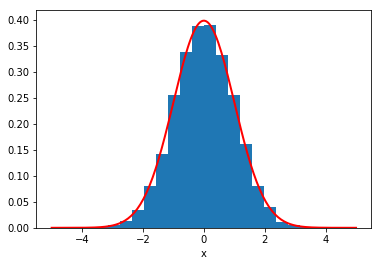

In [19]:
N = 10000
r = np.random.randn(N)
plt.hist(r, normed=True, bins=20)

x = np.linspace(-5,5,200)
sigma = 1.0
plt.plot(x, np.exp(-x**2/(2*sigma**2))/(sigma*np.sqrt(2.0*np.pi)),
         c="r", lw=2)
plt.xlabel("x")


# Plotting data from a file

numpy.loadtxt() provides an easy way to read columns of data from an ASCII file

In [20]:
data = np.loadtxt("test1.exact.128.out")
print(data.shape)

(128, 8)


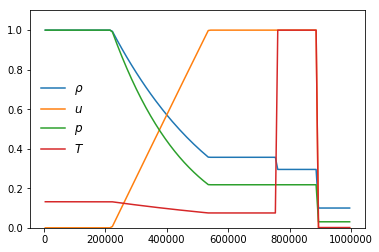

In [21]:
plt.plot(data[:,1], data[:,2]/np.max(data[:,2]), label=r"$\rho$")
plt.plot(data[:,1], data[:,3]/np.max(data[:,3]), label=r"$u$")
plt.plot(data[:,1], data[:,4]/np.max(data[:,4]), label=r"$p$")
plt.plot(data[:,1], data[:,5]/np.max(data[:,5]), label=r"$T$")
plt.ylim(0,1.1)
plt.legend(frameon=False, loc="best", fontsize=12)

# Interactivity

matplotlib has it's own set of widgets that you can use, but recently, Jupyter / Ipython gained the interact() function
(see http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html )

In [22]:
from IPython.html.widgets import *
from IPython.display import display

/home/zingale/.local/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [23]:
x = np.linspace(0,1,100)
def plotsin(f):
    plt.plot(x, np.sin(2*np.pi*x*f))

<function __main__.plotsin>

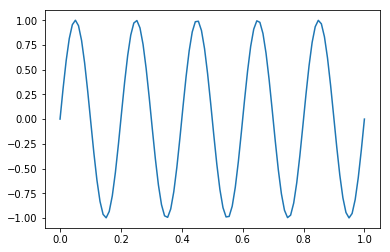

In [24]:
interact(plotsin, f=(1,10,0.1))

<function __main__.hist>

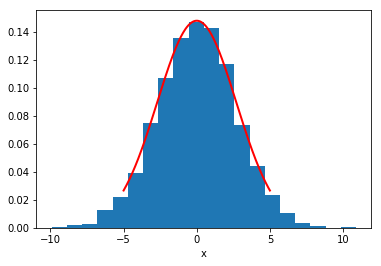

In [25]:
# interactive histogram
def hist(N, sigma):
    r = sigma*np.random.randn(N)
    plt.hist(r, normed=True, bins=20)

    x = np.linspace(-5,5,200)
    
    plt.plot(x, np.exp(-x**2/(2*sigma**2))/(sigma*np.sqrt(2.0*np.pi)),
             c="r", lw=2)
    plt.xlabel("x")
    
interact(hist, N=(100,10000,10), sigma=(0.5,5,0.1))

In [26]:
# based on http://nbviewer.ipython.org/github/adrn/ipython/blob/2.x/examples/Interactive%20Widgets/Widget%20Events.ipynb
def update_button(button):
    button.clicks += 1
    button.description = "%d" % button.clicks

button = Button(description = "Start")
button.clicks = 0
display(button)
button.on_click(update_button)

see: https://github.com/ipython/ipywidgets

# Final fun

if you want to make things look hand-drawn in the style of xkcd, rerun these examples after doing
plt.xkcd()

In [27]:
plt.xkcd()

# Exercises

### Q1: subplots

matplotlib has a number of ways to create multiple axes in a figure -- look at `plt.subplot()` (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)

Create an `x` array using NumPy with a number of points, spanning from $[0, 2\pi]$.  

Create 3 axes vertically, and do the following:

* Define a new numpy array `f` initialized to a function of your choice.
* Plot f in the top axes
* Compute a numerical derivative of `f`,
   $$ f' = \frac{f_{i+1} - f_i}{\Delta x}$$
  and plot this in the middle axes
* Do this again, this time on $f'$ to compute the second derivative and plot that in the bottom axes


### Q2: make a plot related to your discipline

You now should know enough to read in some data (or compute it yourself) and plot it.  Take a look at the gallery and find a plot type that is related to your discipline and make a plot following it.